In [1]:
#Import Library

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [2]:
#Import Data
df = pd.read_csv('dataset1.csv')

In [3]:
#Mengetahui jumlah data
df.shape

(15, 5)

In [4]:
df

,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,3.17,1
1,laki,bekerja,belum,3.30,1
2,perempuan,mhs,belum,3.01,1
3,perempuan,mhs,menikah,3.25,1
4,laki,bekerja,menikah,3.20,0
5,laki,bekerja,menikah,2.50,0
6,perempuan,bekerja,menikah,3.00,0
7,perempuan,bekerja,belum,2.70,0
8,laki,bekerja,belum,2.40,0
9,perempuan,mhs,menikah,2.50,0


In [5]:
X = df.drop(columns="lulus")
y = df.lulus

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 4), (3, 4), (12,), (3,))

In [7]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["ipk"]),
    ('categoric', cat_pipe(encoder='onehot'), ['jenis_kelamin', 'pekerjaan', 'status']),
])


In [8]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])



In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ipk']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['jenis_kelamin', 'pekerjaan',
                                                   'status'])])),
                ('algo', GaussianNB())])

In [10]:
pipeline.score(X_train, y_train)

0.9166666666666666

In [11]:
pipeline.score(X_test, y_test)

1.0

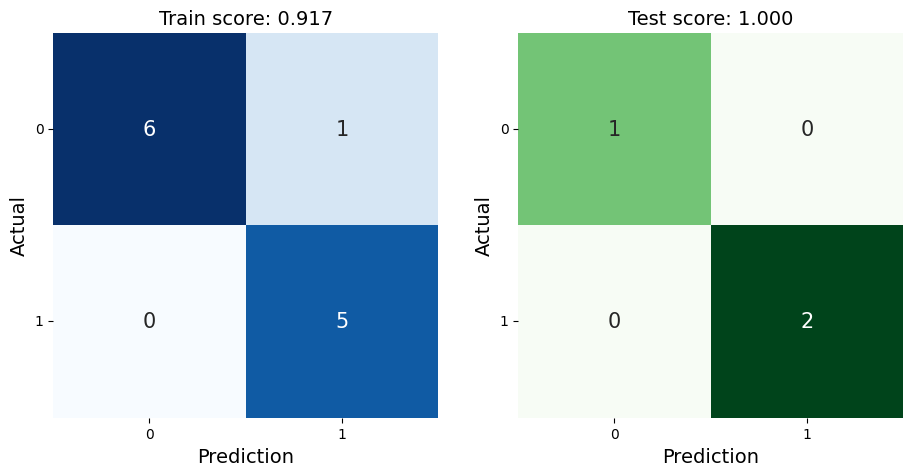

In [87]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [14]:
X_pred = pd.read_csv("testing.csv")
X_pred

,jenis_kelamin,pekerjaan,status,ipk
0,laki,mhs,belum,2.7


In [15]:
pipeline.predict(X_pred)

array([0], dtype=int64)

In [16]:
X_pred["lulus"] = pipeline.predict(X_pred)
X_pred


,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,2.7,0
